In [1]:
import pandas as pd
from pandas import DataFrame, Series
from numpy import nan
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (24,5)
import seaborn as sns
sns.set()
sns.set(font_scale=1.75)
import scipy

In [2]:
cols = ["test", "map"]  + [50000,    100000,   150000,   200000,   250000,   300000,   350000,   400000,   500000,  600000,  700000,
       800000,   900000,   1000000]
data = pd.read_csv("results.csv", header=None)
data.columns = cols
tests = data["test"].unique()
maps = data["map"].unique()
data_dict = dict()
for t in tests:
    for m in maps:
        data_dict[(t,m)] = data[(data["map"] == m) & (data["test"] == t)]     
for k,v in data_dict.items():
    # keep only the ones that are within +3 to -3 standard deviations
    data_dict[k] = v[np.abs(v - v.mean()) <= (3*v.std())].drop(["test", "map"], axis=1)


<ipython-input-2-66127ad8ad5a>:13: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_dict[k] = v[np.abs(v - v.mean()) <= (3*v.std())].drop(["test", "map"], axis=1)
<ipython-input-2-66127ad8ad5a>:13: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_dict[k] = v[np.abs(v - v.mean()) <= (3*v.std())].drop(["test", "map"], axis=1)
<ipython-input-2-66127ad8ad5a>:13: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_dict[k] = v[np.abs(v - v.mean()) <= (3*v.std())].drop(["test",

In [3]:
data.describe()

,50000,100000,150000,200000,250000,300000,350000,400000,500000,600000,700000,800000,900000,1000000
count,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000
mean,243.704716,244.392216,744.833458,350.738024,410.998503,207.206213,498.119386,220.396707,232.143713,749.024326,231.294162,236.760479,1032.674027,248.031063
std,280.311624,283.315714,1198.406489,527.831220,684.810993,106.164512,948.029348,109.487892,108.496679,1713.976925,114.422396,115.280776,2562.773380,111.782187
min,35.000000,47.000000,61.000000,64.000000,63.000000,66.000000,68.000000,70.000000,71.000000,70.000000,71.000000,74.000000,75.000000,77.000000
25%,59.750000,74.000000,93.000000,94.000000,102.000000,105.000000,108.000000,111.000000,117.000000,115.000000,117.000000,118.000000,121.000000,129.000000
50%,153.000000,180.000000,203.000000,202.000000,215.000000,205.000000,213.500000,219.000000,234.000000,220.000000,226.000000,235.000000,245.000000,253.000000
75%,275.000000,222.000000,707.000000,283.000000,300.000000,270.000000,322.000000,288.250000,295.250000,340.000000,307.000000,306.000000,352.000000,311.000000
max,2416.000000,1794.000000,9992.000000,2923.000000,3574.000000,527.000000,4331.000000,640.000000,579.000000,7376.000000,581.000000,657.000000,11403.000000,559.000000


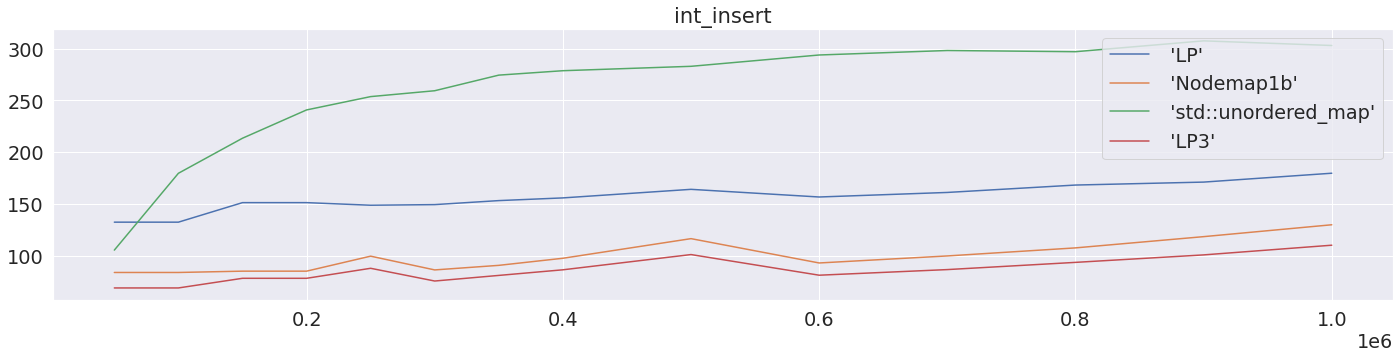

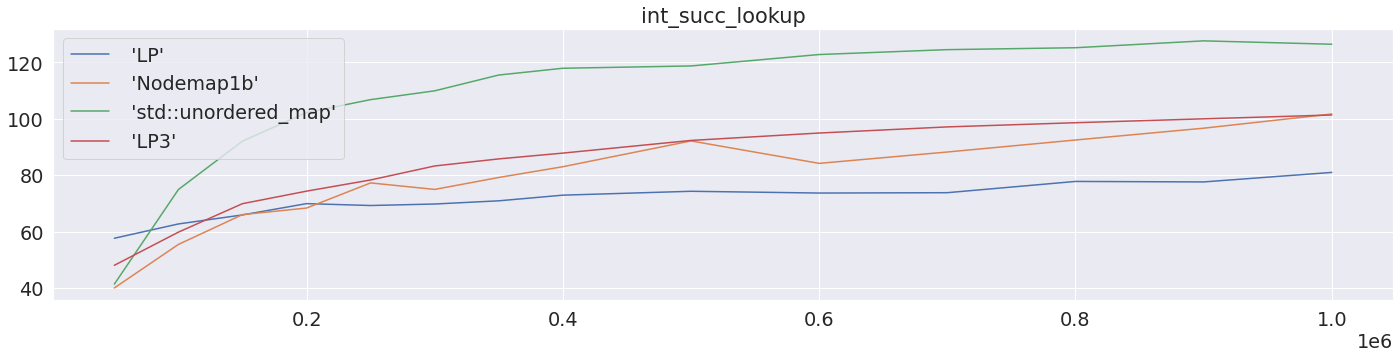

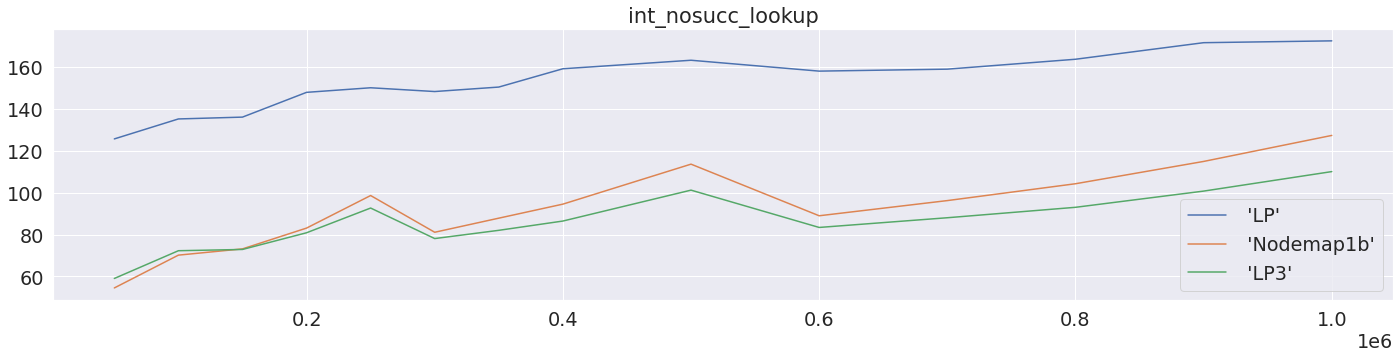

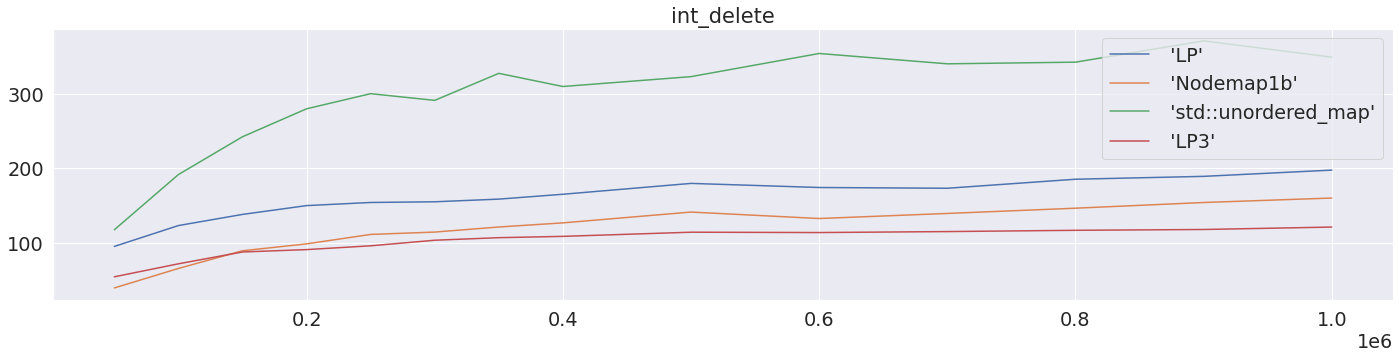

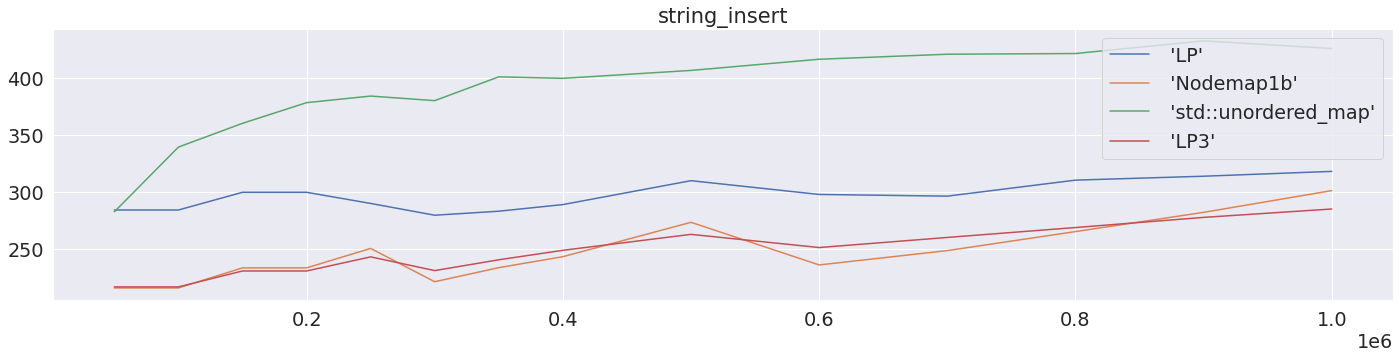

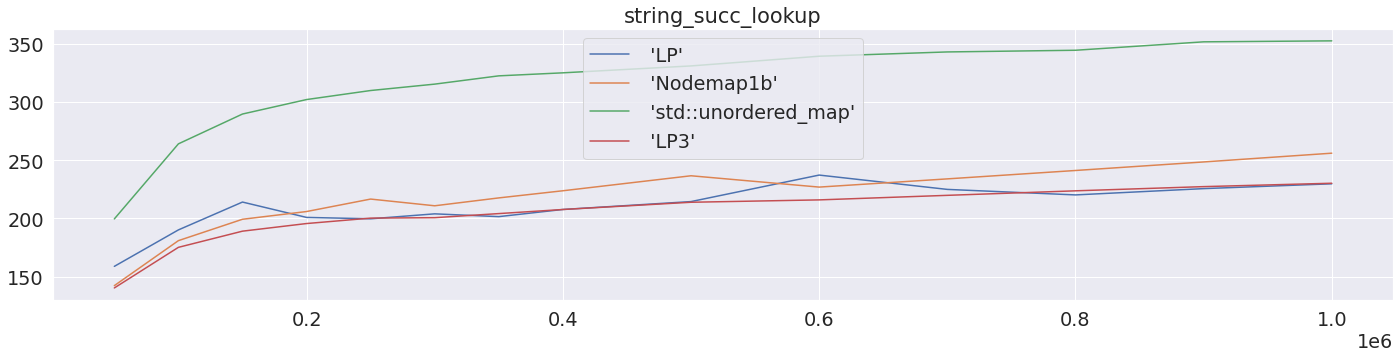

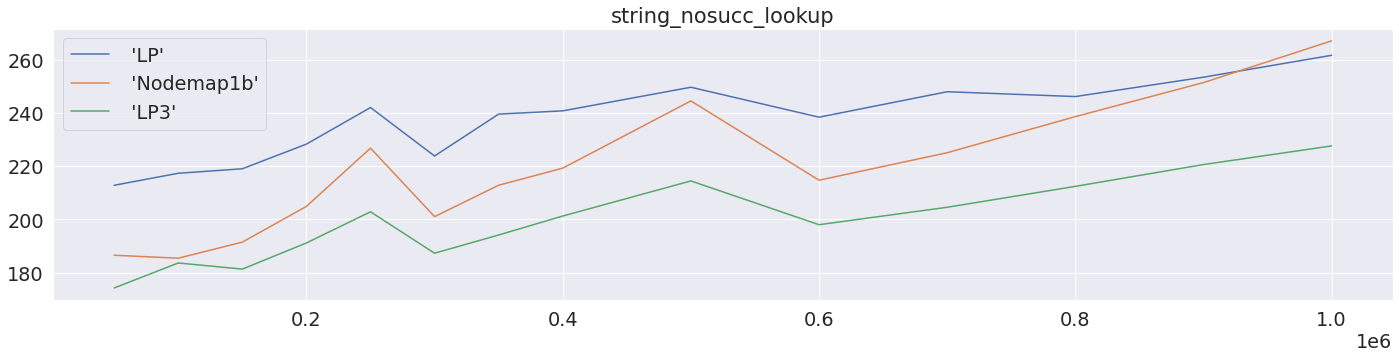

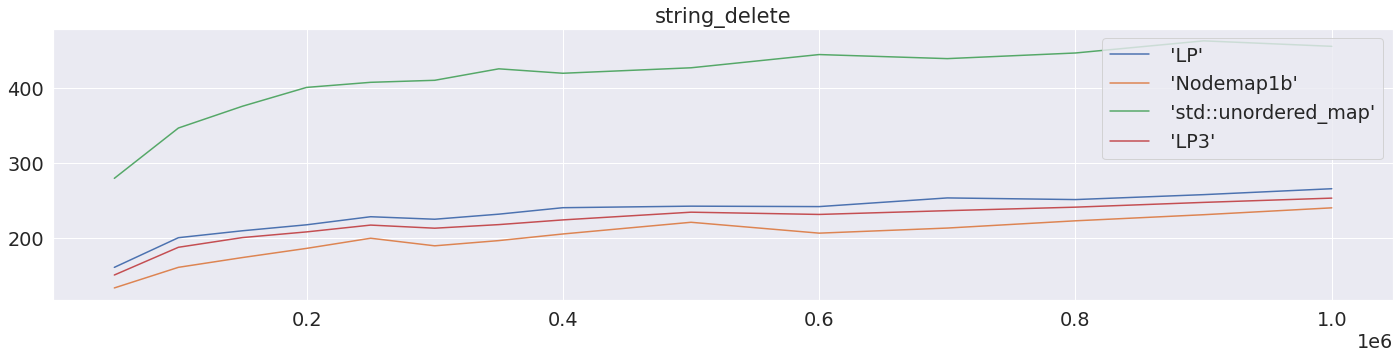

In [3]:
def gen_graph(test):
    badtest= ["int_insert", "string_insert"]
    for m in maps:
        mdata = data_dict[(test,m)].mean()
        if m in [" 'LP'", " 'Nodemap1b'", " 'LP3'"] and test in badtest:
            mdata.iloc[2] = mdata.iloc[3]
            mdata.iloc[0] = mdata.iloc[1]
        if m == " 'std::unordered_map'" and test in ["int_nosucc_lookup", "string_nosucc_lookup"]:
            continue
        sns.lineplot(x=mdata.index, y=mdata, label=m)
    plt.title(test)
    plt.show()
for i in tests:
    gen_graph(i)

<ipython-input-5-98e54abf372a>:13: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_dict[k] = v[np.abs(v - v.mean()) <= (3*v.std())].drop(["test", "map"], axis=1)
<ipython-input-5-98e54abf372a>:13: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_dict[k] = v[np.abs(v - v.mean()) <= (3*v.std())].drop(["test", "map"], axis=1)
<ipython-input-5-98e54abf372a>:13: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_dict[k] = v[np.abs(v - v.mean()) <= (3*v.std())].drop(["test",

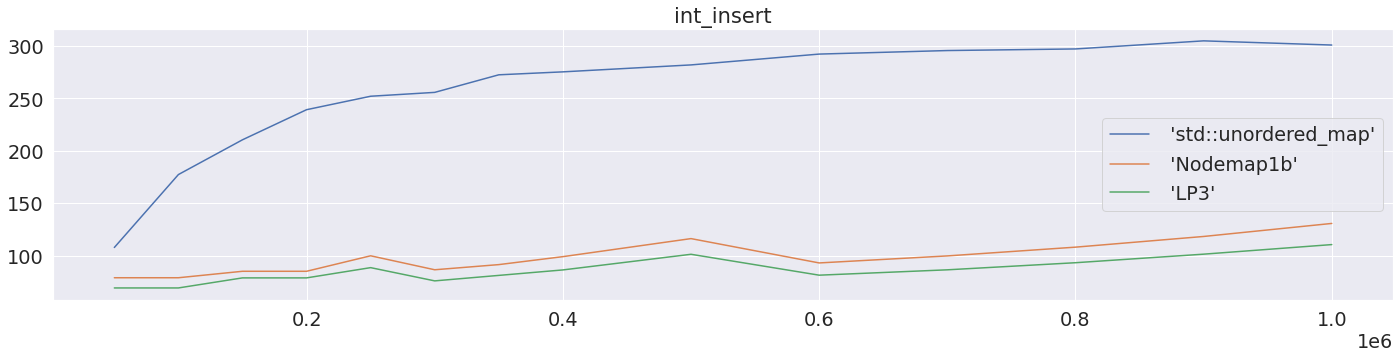

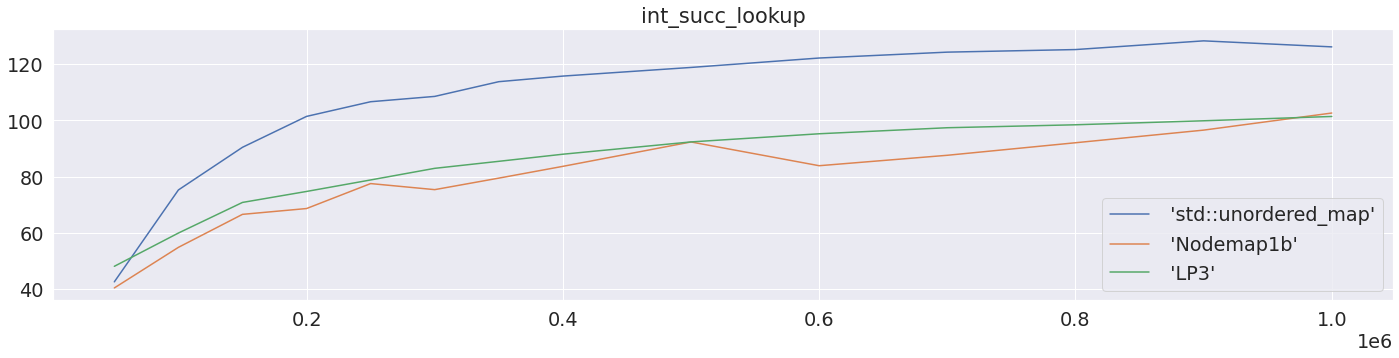

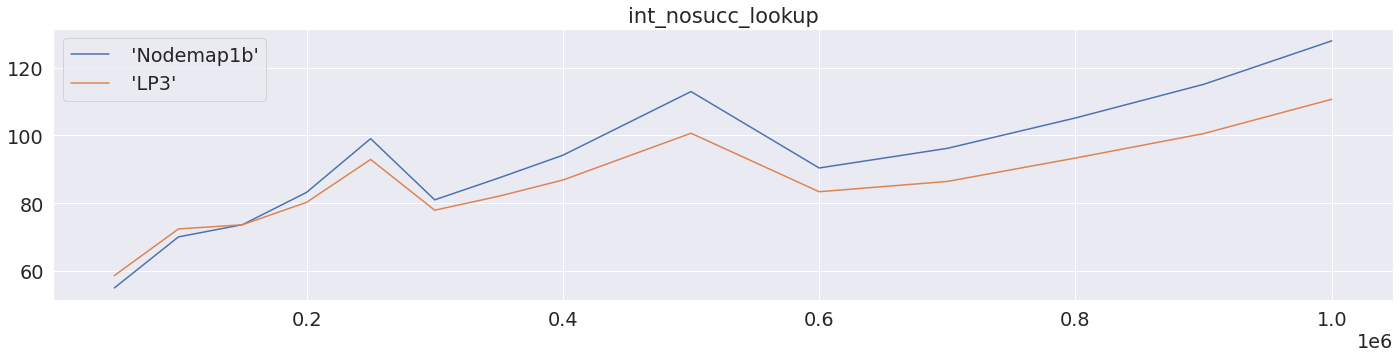

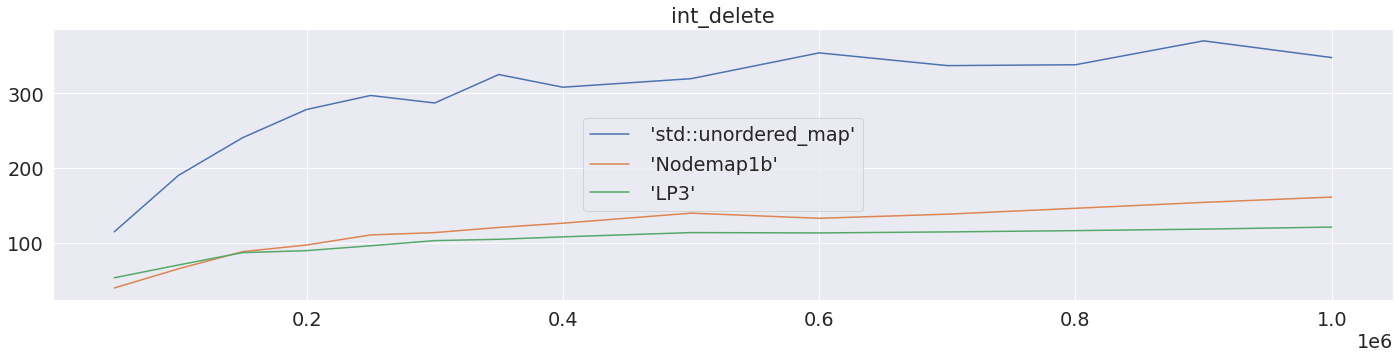

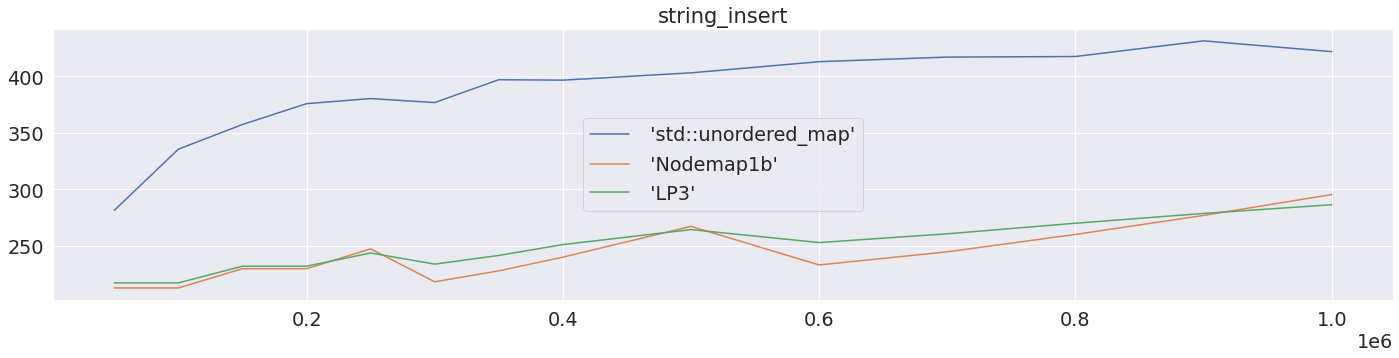

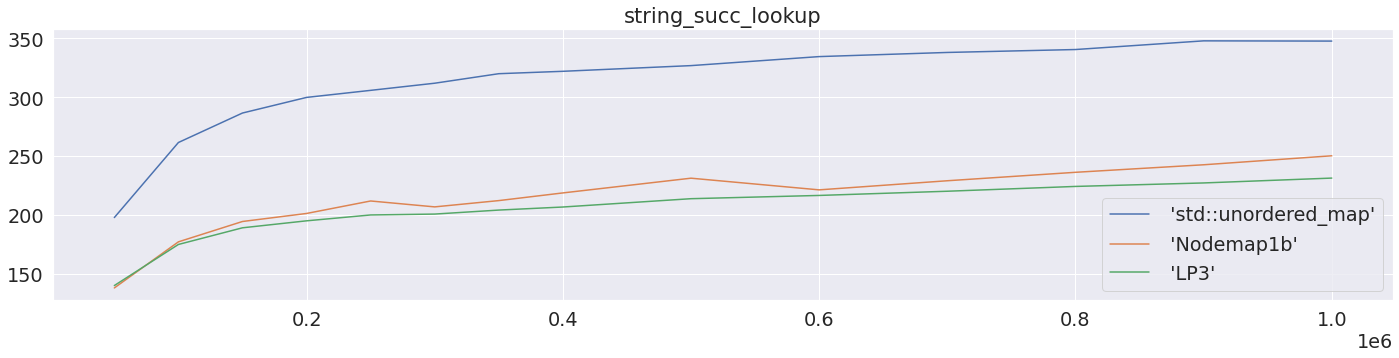

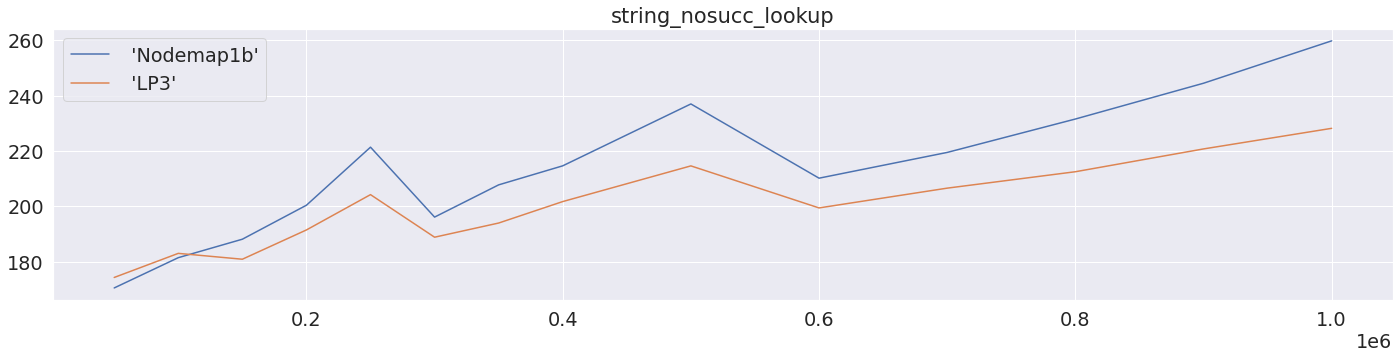

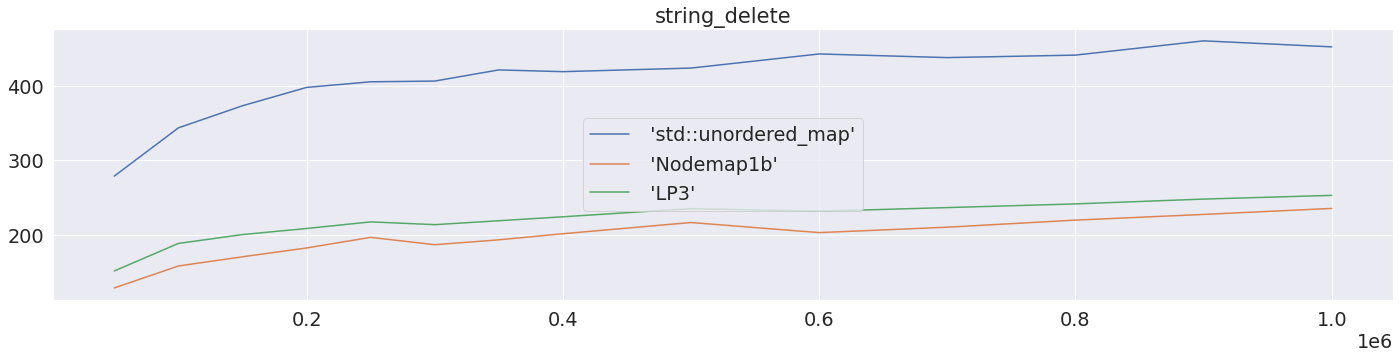

In [5]:
cols = ["test", "map"]  + [50000,    100000,   150000,   200000,   250000,   300000,   350000,   400000,   500000,  600000,  700000,
       800000,   900000,   1000000]
data = pd.read_csv("results_gcc.csv", header=None)
data.columns = cols
tests = data["test"].unique()
maps = data["map"].unique()
data_dict = dict()
for t in tests:
    for m in maps:
        data_dict[(t,m)] = data[(data["map"] == m) & (data["test"] == t)]     
for k,v in data_dict.items():
    # keep only the ones that are within +3 to -3 standard deviations
    data_dict[k] = v[np.abs(v - v.mean()) <= (3*v.std())].drop(["test", "map"], axis=1)
for i in tests:
    gen_graph(i)